In [2]:
#уровень 0
#Посчитайте частные производные функций:
#1) f(x,y)=2x^2y^3 + 1/x + y^2x + 7, а для этой функции также градиент в точке (1,2)
#2) f(x,y)=x^2y - sin(xy) + cos(x^2) + 6y

import numpy as np
from scipy.optimize import approx_fprime
from scipy.misc import derivative
from sympy import * 
import sympy

x, y = symbols('x y')

f1 = 2*(x**2)*(y**3) + 1/x + x*(y**2) + 7
f2 = y*(x**2) - sin(x*y) + cos(x**2) + 6*y
print("Производная f1 по dx: " + str(sympy.diff(f1,x)))
print("Производная f1 по dy: " + str(sympy.diff(f1,y)))
print("Производная f2 по dx: " + str(sympy.diff(f2,x)))
print("Производная f2 по dy: " + str(sympy.diff(f2,y)))

def func(x, c0, c1):
    return c0*(x[0]**2)*(x[1]**3) + 1/x[0] + (x[0]*x[1]**2) + c1

z = np.array([1.,2.])
c0, c1 = (2,7)
eps = np.sqrt(np.finfo(float).eps)
print("Градиент F1 в точке (1,2): " + str(approx_fprime(z, func, [eps, eps], c0, c1)))


Производная f1 по dx: 4*x*y**3 + y**2 - 1/x**2
Производная f1 по dy: 6*x**2*y**2 + 2*x*y
Производная f2 по dx: 2*x*y - 2*x*sin(x**2) - y*cos(x*y)
Производная f2 по dy: x**2 - x*cos(x*y) + 6
Градиент F1 в точке (1,2): [35.00000024 28.00000024]


In [24]:
#уровень 1
#Градиентный спуск своими руками:

import scipy

def f(x):
    return (x[0]**2) + (x[1]**2)

x = np.array([100, 200])
learning_rate = 0.1

for i in range(100):
    # Calculate gradient
    grad = approx_fprime(x, f, 1e-8) # Your code here (функция для вычисления градиента есть в лекционном ноутбуке)
    
    # Update x with gradient
    x = x - learning_rate * grad # Your code here (смотри слайд презентации про градиентный спуск)

print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x), '\n')

#Проверка с помощью встроенной функции numpy:
#print(np.gradient(f, learning_rate))
res = scipy.optimize.minimize(f, x, method='nelder-mead',
    options={'xtol': 1e-8, 'disp': True})
print(res)

Минимум достигается в:  [1.53703462e-08 3.57407209e-08]
Значение функции в минимуме:  1.5136466716686949e-15 

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
 final_simplex: (array([[1.53703462e-08, 3.57407209e-08],
       [1.61388635e-08, 3.57407209e-08],
       [1.53703462e-08, 3.75277569e-08]]), array([1.51364667e-15, 1.53786204e-15, 1.64458008e-15]))
           fun: 1.5136466716686949e-15
       message: 'Optimization terminated successfully.'
          nfev: 3
           nit: 1
        status: 0
       success: True
             x: array([1.53703462e-08, 3.57407209e-08])


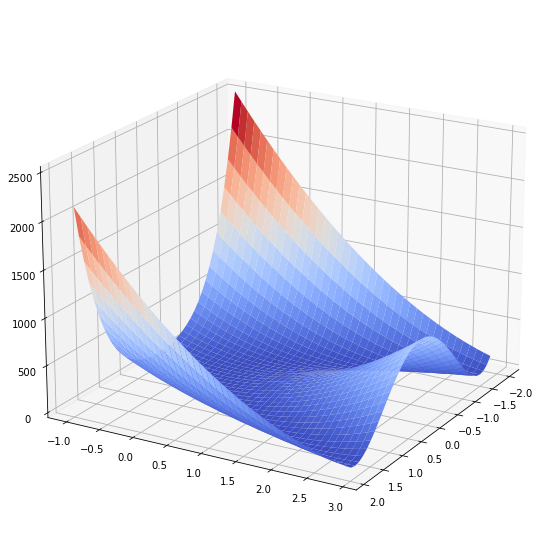

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy

# Настраиваем 3D график
fig = plt.figure(figsize=[15, 10])
ax = fig.gca(projection='3d')

# Задаем угол обзора
ax.view_init(20, 30)

# Создаем данные для графика
X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = scipy.optimize.rosen(np.array([X,Y]))

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show()